# Observations and Insights

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [4]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on ='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
len(combined_data['Mouse ID'])

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID.

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data2 = combined_data.drop_duplicates(['Mouse ID', 'Timepoint'])
combined_data2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
len(combined_data2['Mouse ID'])

1888

# Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimens = combined_data2.groupby(["Drug Regimen"])

tumor_summary_df = pd.DataFrame({
    "Tumor Mean": drug_regimens['Tumor Volume (mm3)'].mean(),
    "Tumor Median": drug_regimens['Tumor Volume (mm3)'].median(),
    "Tumor Variance": drug_regimens['Tumor Volume (mm3)'].var(),
    "Tumor Std Dev": drug_regimens['Tumor Volume (mm3)'].std(),
    "Tumor SEM": drug_regimens['Tumor Volume (mm3)'].sem()})
tumor_summary_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# find an aggregation of column "Tumor Volume (mm3), grouped by Drug Regimen" 

#combined_data2.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem", axis="Tumor Volume (mm3)"]) 


# Bar and Pie Charts

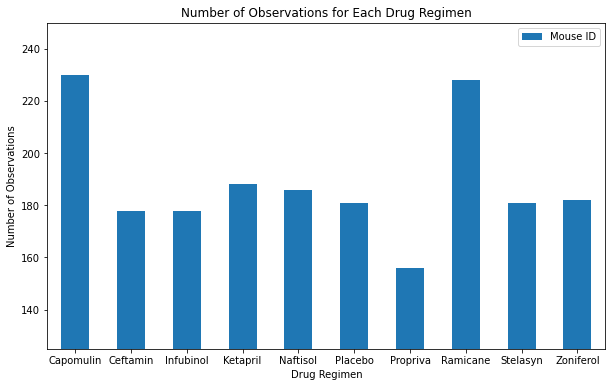

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Filtering the DataFrame to only chart Drug Regimens and the number of meansurements for each
regimen_count = drug_regimens['Mouse ID'].count()

# drug_regimens is grouped by Drug Regimen and they will be used as the label

regimen_count.plot(kind='bar', figsize=(10,6), rot=0)
plt.ylim(125, 250)
plt.ylabel("Number of Observations")
plt.title("Number of Observations for Each Drug Regimen")
plt.legend()
plt.show()

<Figure size 5040x3600 with 0 Axes>

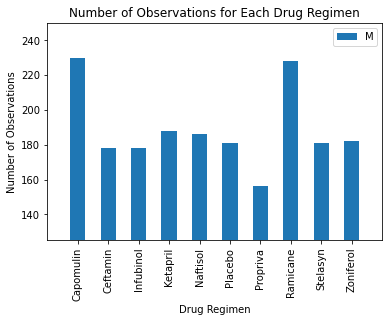

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_regimens_count = combined_data2.groupby("Drug Regimen").count()['Tumor Volume (mm3)']
drug_regimens_count_df = pd.DataFrame(drug_regimens_count)

plt.figure(figsize=(70,50))
plt.xdata = drug_regimens_count_df.plot.bar(legend=False)
plt.xlim(-1, len(drug_regimens_count))
plt.ylim(125, 250)
#plt.xticks(rotation='horizontal')
plt.title("Number of Observations for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observations")

plt.legend('Mouse ID')
plt.show()

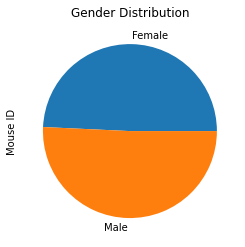

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Determine the distribution of females versus males
gender_counts = combined_data2.groupby('Sex')['Mouse ID'].count()

# Create a pie chart of the Gender Distribution 
gender_pie_plot = gender_counts.plot.pie(y='Sex', title = 'Gender Distribution')

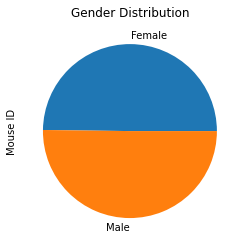

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Determine the distribution of females versus males and create a DataFrame
gender_counts = combined_data2.groupby('Sex')['Mouse ID'].nunique()
gender_counts_df = pd.DataFrame(gender_counts)
gender_counts_df

# Create a pie chart of the Gender Distribution 

plt.pie(gender_counts, labels=gender_counts.index);
plt.title('Gender Distribution')
plt.ylabel('Mouse ID')
plt.show()

# Quartiles, Outliers and Boxplots

In [31]:
# remove this....just here for easy viewing
combined_data2.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [29]:
# remove this...just here for easy viewing
mouse_group = combined_data2.groupby(["Mouse ID"])
len(mouse_group)

249

In [30]:
# remove this....just here for easy viewing
regimen_mouse_group = combined_data2.groupby(["Drug Regimen","Mouse ID"])
len(regimen_mouse_group)

249

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_regimens_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_regimens = combined_data2[combined_data2['Drug Regimen'].isin(four_regimens_list)]
four_regimens

# Start by getting the last (greatest) timepoint for each mouse
four_best_timepoint = four_regimens.groupby("Mouse ID").last()['Timepoint']
four_best_timepoint_df = pd.DataFrame(four_best_timepoint)
four_best_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
promising_regimens_merged = pd.merge(four_best_timepoint_df, combined_data2, how = 'left', on =('Mouse ID', 'Timepoint')).sort_values(['Drug Regimen'])
promising_regimens_merged


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
49,l897,45,Capomulin,Male,17,19,38.846876,1
34,j119,45,Capomulin,Female,7,23,38.125164,1
35,j246,35,Capomulin,Female,21,21,38.753265,1
78,u364,45,Capomulin,Male,18,17,31.023923,3
26,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
37,j913,45,Ramicane,Female,4,17,31.560470,1
38,j989,45,Ramicane,Male,8,19,36.134852,1
40,k403,45,Ramicane,Male,21,16,22.050126,1
50,m546,45,Ramicane,Male,18,16,30.564625,1


In [72]:
# # Put treatments into a list for for loop (and later for plot labels)
treatments = regimen_data_merged['Drug Regimen'].unique()
#treatments = pd.DataFrame(regimen_data_merged)
treatments

# Create empty list to fill with tumor vol data (for plotting)
#promsing_regimens=[]
#tumor_vol_data = [regimen_data_merged.loc[regimen_data_merged['Drug Regimen'] == 
#promising_regimens[i],'Tumor Volume (mm3)'] for i in range(4)]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for treatment in treatments


#quartiles = temperatures.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen